In [55]:

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
df = pd.read_csv("StudentsPerformance.csv")

In [57]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [60]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [61]:
df["final_score"] = (
    df["math score"] +
    df["reading score"] +
    df["writing score"]
) / 3

In [62]:
features = [
    "parental level of education",
    "test preparation course",
    "lunch",
    "gender",
    "race/ethnicity"
]

In [63]:
X = df[features]
y = df["final_score"]

In [64]:
label_encoder = LabelEncoder()

X["test preparation course"] = label_encoder.fit_transform(
    X["test preparation course"]
)

X["lunch"] = label_encoder.fit_transform(
    X["lunch"]
)

X["gender"] = label_encoder.fit_transform(
    X["gender"]
)

C:\Users\freaky manoj\AppData\Local\Temp\ipykernel_30068\1007057215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["test preparation course"] = label_encoder.fit_transform(
C:\Users\freaky manoj\AppData\Local\Temp\ipykernel_30068\1007057215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["lunch"] = label_encoder.fit_transform(
C:\Users\freaky manoj\AppData\Local\Temp\ipykernel_30068\1007057215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [65]:
print(df['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [66]:
education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

ordinal_encoder = OrdinalEncoder(categories=[education_order])

X["parental level of education"] = ordinal_encoder.fit_transform(
    X[["parental level of education"]]
)

C:\Users\freaky manoj\AppData\Local\Temp\ipykernel_30068\3048744264.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["parental level of education"] = ordinal_encoder.fit_transform(


In [67]:
X = pd.get_dummies(X, columns=["race/ethnicity"], drop_first=True)

print("\nEncoded Features:")
X.head()


Encoded Features:


,parental level of education,test preparation course,lunch,gender,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,4.0,1,1,0,True,False,False,False
1,2.0,0,1,0,False,True,False,False
2,5.0,1,1,0,True,False,False,False
3,3.0,1,0,1,False,False,False,False
4,2.0,1,1,1,False,True,False,False


In [68]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 800
Testing samples: 200


In [69]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MODEL PERFORMANCE
MSE: 176.30549218124193
RMSE: 13.278007839327477
R2 Score: 0.17755135549942613


In [72]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nFeature Influence:")
print(coefficients.sort_values(by="Coefficient", ascending=False))


Feature Influence:
                       Feature  Coefficient
2                        lunch     4.407335
0  parental level of education     2.314199
7       race/ethnicity_group E     1.998781
6       race/ethnicity_group D     1.543029
5       race/ethnicity_group C     0.282046
4       race/ethnicity_group B    -0.192104
3                       gender    -2.078376
1      test preparation course    -3.845124


In [73]:
ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print("\nRIDGE PERFORMANCE")
print("R2:", r2_score(y_test, ridge_pred))


RIDGE PERFORMANCE
R2: 0.17747605547289558


In [74]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print("\nLASSO PERFORMANCE")
print("R2:", r2_score(y_test, lasso_pred))


LASSO PERFORMANCE
R2: 0.174340035471239


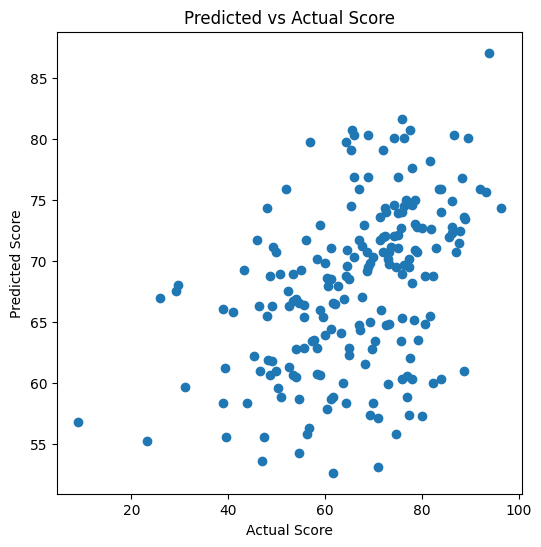

In [75]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Score")
plt.show()


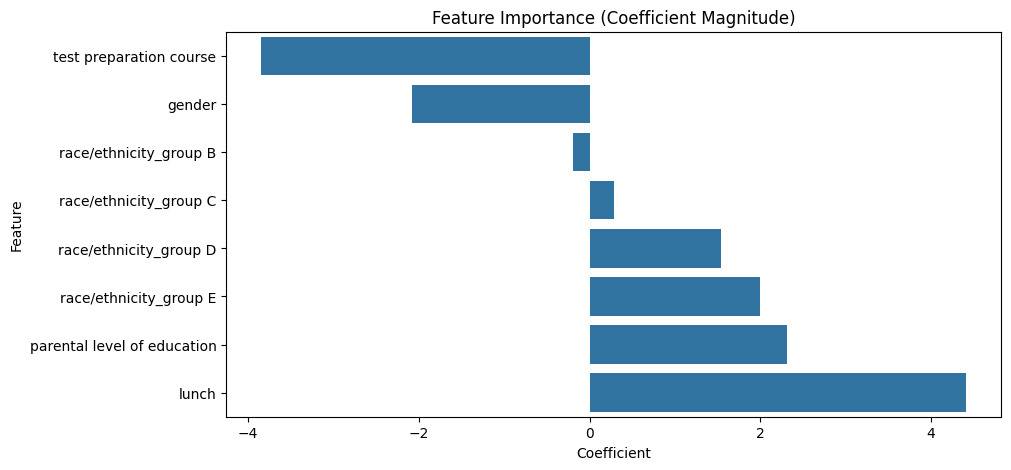

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=coefficients.sort_values(by="Coefficient")
)
plt.title("Feature Importance (Coefficient Magnitude)")
plt.show()

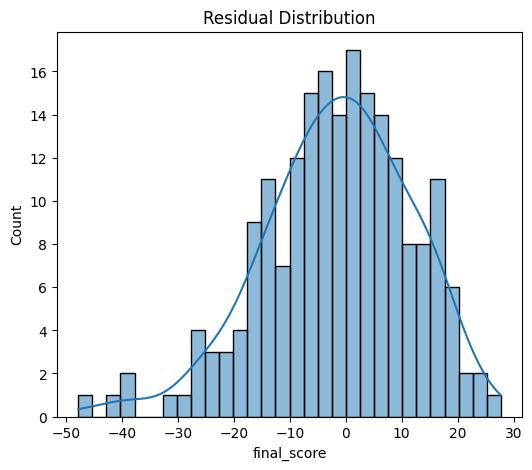

In [77]:
residuals = y_test - y_pred

plt.figure(figsize=(6,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()